# study the impact of the news

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import thulac
import string
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## load news data of 000001.SZ

In [4]:
news = pd.read_csv('../news/000001.SZ.csv')[['date','title']]
news = news.sort_values('date')
is_useful = np.array([not bool(re.search('融资融券信息',l)) for l in news['title'].values])
is_useful = is_useful & np.array([not bool(re.search('大宗交易数据',l)) for l in news['title'].values])
news = news[is_useful]
news['date'] = list(map(lambda x: int(x.replace('-','')), news['date'].values))
news['title'] = [l+' ' for l in news['title'].values]
news = news.groupby('date').sum().reset_index()
news['title'] = [re.sub('\d+|[a-z]+|[A-Z]+', '0',s) for s in news['title'].values]
news

date                                              title
0    20110512         证监会通过“平深恋”重组方案 深发展0日复牌 深发展0重大资产重组获通过 0日复牌 
1    20110513                                   “平深恋”获批 深发展0今复牌 
2    20110516     缝合平安深发展 年底是“两家变一家”最后期限 平深恋获批：0城0网点大整合 深发展之名不变 
3    20110517                                   平深恋“领证” 深发展复牌微涨 
4    20110526  深发展保资本充足率不分红 董事会称考虑再融资 保资本充足率不分红 深发展考虑再“补血” 理查...
5    20110527                                     深发展董事长：正考虑再融资 
6    20110608                                深发展通过平安银行盈利厘定等三项议案 
7    20110610                                   浦发银行：0月与移动“深发展” 
8    20110615                             平安银行股东会延期 小股东争议深发展表决权 
9    20110624                             深发展绿色信贷排名倒数第一 变相支持高污染 
10   20110629           平深恋“过会” 深发展控股平安银行 深发展收购平安银行已获批 暂时保持独立运作 
11   20110630                        深发展平台贷占比降至0.0% 深发展或将定向增发募资 
12   20110704                                   深发展：发令枪响 直奔黄金未来 
13   20110705                   深发展本月确定收购日 “嫁入”平安 深发展谋划0年奠定市场地位 
14   20110706                                   深发展或通过增发提高资本充足率 
15   20110710                               两年收官 深发展平安银行整合时间表起底 
16   20110712                                  深发展0上半年业绩预增0%-0% 
17   20110713  农行和深发展上半年净利预增逾0% 农行和深发展预报中期业绩靓丽 农行中期净利预增0% 深发展...
18   20110714              深发展上半年净利预增五成 净利润或达到0.0亿 深发展上半年净利预增五成 
19   20110719                                    深发展成为航运运价交易结算行 
20   20110728  深发展0：与中国平安重组工作完成 中国平安完成重组 入主深发展0 深发展定向增发收购平安银行...
21   20110729  深发展定向增发收购平安银行股份完成 整合手续办毕 平安承诺给予深发展“五独立” 深发展定向增...
22   20110802                                       平深整合：向深发展倾斜 
23   20110803                 深发展00.0亿股定增股份0月0日上市 中国平安成为深发展控股股东 
24   20110808                            0亿定增股上市 平安深发展两年整合倒计时开始 
25   20110811                                    深发展携中铁打造金融综合平台 
26   20110816  牵手中铁 深发展供应链金融进入金融物流实时数据交互时代 中国平安和深发展筹划重大事项 股票停...
27   20110817  中国平安与深发展双双停牌一天 筹划重大交易 深发展定增方案出炉 中国平安将注资不超0亿元 深...
28   20110818  深发展半年净利同比增0% 补充资本仍急 平安宣布注资深发展0亿 深发展0：拟向平安定增募0亿...
29   20110819  深发展：未收到平安进一步增持信息 注资深发展不影响平安偿付能力 0亿元补水深发展 平安称无压...
..        ...                                                ...
766  20190319      0平安银行私人银行投资论坛日前在深圳举行 平安银行大连两宗违规遭罚 销售基金代填风险问卷 
767  20190326                          北向资金逆市净买入近0亿元 三股净买入额超0亿元 
768  20190329               金融科技战略描述已是银行“标配” “科技引领”已成平安银行发展战略之首 
769  20190410                          平安银行0月已收0张罚单 监管严查信贷资金被挪用 
770  20190411                          平安银行天津三宗违法遭罚0万 部分信贷资金被挪用 
771  20190415                         平安银行杭州违法遭罚 未按规定进行国际收支统计申报 
772  20190418     平安银行(0.0)获准发行不超0亿元二级资本债券 平安银行：获准发行不超0亿元二级资本债券 
773  20190419                                  平安银行三位副行长任职资格获核准 
774  20190423  平安银行一季度净利润0.0亿元 同比增长0.0% 平安银行：0年一季度净利0.0亿元 同比增...
775  20190424  群益证券：预计平安银行今年净利按年增逾0% 平安银行加入永续债发行阵营 商业银行预计发行近五...
776  20190425  平安银行拟发行0亿元永续债 力争0年总资本充足率达0.0% 平安银行首季净利同比增0.0% ...
777  20190426                平安银行完成发行0亿人币二级资本债 平安银行完成发行0亿元二级资本债 
778  20190429             平安银行重庆分行遭银监处罚 违法借贷搭售 平安银行0亿元二级资本债发行完毕 
779  20190430                            平安银行(0.0)成功发行0亿元二级资本债券 
780  20190507        摩根士丹利下调四大行评级 看好平安和光大 摩根士丹利下调四大行股票评级 看涨平安银行 
781  20190520                         平安银行成都两宗违法遭罚 征信查询用户未向央行备案 
782  20190521  平安银行信用卡中心上海违法遭罚 员工经商办企业 0月0日平安银行(0)董监高相关人员孙永林减...
783  20190524                   不良资产处置靠信息不对称获利？平安银行探索不良创新开放处置模式 
784  20190528                           平安银行南昌违法遭罚 违反银行结算账户管理办法 
785  20190530  平安银行董事长：平安集团团体综合金融业务将以银行为核心展开 平安银行董事长谢永林：平安集团团...
786  20190531  平安银行董事长谢永林：平安集团团体综合金融业务将以银行为核心展开 平安银行股份有限公司0年年...
787  20190601                        为非法平台提供支付服务等 平安银行温州分行吃百万罚单 
788  20190603    平安银行福清支行违法遭罚 未按规定开展客户身份识别 平安银行副行长姚贵平赴任平安信托党委书记 
789  20190604        平安银行股份有限公司关于董事辞任的公告 平安信托换帅 平安银行副行长姚贵平接棒任汇川 
790  20190619                      平安银行(0.0)年报推0派0.0元 股权登记日0月0日 
791  20190620            银行板块拉升 平安银行大涨0% 平安银行股份有限公司0年年度权益分派实施公告 
792  20190627                                     平安银行三阶段打造0 00 
793  20190703                            平安银行：基本面迎拐点 首次覆盖给予买入评级 
794  20190705                          平安银行宁波违法遭罚0万 住房按揭贷款管理不规范 
795  20190709  融入消费新场景 平安银行达成00内地独家联名卡合作 平安招

### clean the text

In [5]:
punctuation = '"#$&\'()*+,-/:;<=>@[\\]^_`{|}~.!?＂＃＄＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。'
# thu1 = thulac.thulac(user_dict='tmp.csv', seg_only=True)
thu1 = thulac.thulac(user_dict='company_name.csv', seg_only=True)
# s = '中国平安与深发展双双停牌一天 筹划重大交易 深发展定增方案出炉 中国平安将注资不超200亿元'
# thu1.cut(s.translate(s.maketrans('','',punctuation)), text=True)
news['title'] = [s.translate(str.maketrans('','',punctuation)) for s in news['title'].values]
news['title'] = [thu1.cut(s, text=True) for s in news['title'].values]

news

Model loaded succeed


date                                              title
0    20110512  证监会 通过 平深恋 重组 方案 深 发展 0日 复牌 深 发展0 重大 资产 重组 获 通...
1    20110513                                 平深恋 获 批 深 发展0 今 复牌
2    20110516  缝合 平安 深 发展 年底 是 两 家 变 一 家 最后 期限 平 深恋 获 批0 城0 网...
3    20110517                                  平深恋 领证 深 发展 复牌 微涨
4    20110526  深 发展 保 资本 充足率 不 分红 董事会 称 考虑 再 融资 保 资本 充足率 不 分红...
5    20110527                                 深 发展 董事长 正 考虑 再 融资
6    20110608                        深 发展 通过 平安银行 盈利 厘定 等 三 项 议案
7    20110610                                  浦发银行 0月 与 移动 深 发展
8    20110615                      平安银行 股东 会 延期 小 股东 争议 深 发展 表决权
9    20110624                     深 发展 绿色 信贷 排名 倒数 第一 变相 支持 高 污染
10   20110629  平深恋 过 会 深 发展 控股 平安银行 深 发展 收购 平安银行 已 获 批 暂时 保持 ...
11   20110630          深 发展 平台 贷 占 比 降 至 00 % 深 发展 或 将 定向 增 发 募资
12   20110704                               深 发展 发令枪 响 直奔 黄金 未 来
13   20110705           深 发展 本月 确定 收购日 嫁入 平安 深 发展 谋划0 年 奠定 市场 地位
14   20110706                            深 发展 或 通过 增 发 提高 资本 充足率
15   20110710                          两 年收官 深 发展 平安银行 整合时间表 起 底
16   20110712                             深 发展0 上半年 业绩 预增0 % 0 %
17   20110713  农行 和 深 发展 上半年 净利 预增 逾0 % 农行 和 深 发展 预报 中期 业绩 靓丽...
18   20110714  深 发展 上半年 净利 预增 五 成 净利润 或 达到00亿 深 发展 上半年 净利 预增 五 成
19   20110719                              深 发展 成为 航运 运 价 交易 结算行
20   20110728  深 发展0 与 中国平安 重组 工作 完成 中国平安 完成 重组 入 主深 发展0 深 发展...
21   20110729  深 发展 定向 增 发 收购 平安银行 股份 完成 整合 手续 办 毕 平安 承诺 给 予深...
22   20110802                                    平深 整合 向 深 发展 倾斜
23   20110803        深 发展000亿 股 定增 股份0月 0日 上市 中国平安 成为 深 发展 控股 股东
24   20110808                   0亿 定 增股 上市 平安 深 发展 两 年 整合 倒计时 开始
25   20110811                             深 发展 携 中 铁 打造 金融 综合 平台
26   20110816  牵 手中 铁 深 发展 供应链 金融 进入 金融 物流 实时 数据 交互 时代 中国平安 和...
27   20110817  中国平安 与 深 发展 双双 停牌 一 天 筹划 重大 交易 深 发展 定增 方案 出炉 中...
28   20110818  深 发展 半 年 净利 同比 增0 % 补充 资本 仍 急 平安 宣布 注 资深 发展 0亿...
29   20110819  深 发展 未 收到 平安 进一步 增持 信息 注 资深 发展 不 影响 平安 偿付 能力 0...
..        ...                                                ...
766  20190319  0平安 银行 私人 银行 投资 论坛 日前 在 深圳 举行 平安银行 大 连 两 宗 违规 ...
767  20190326                  北向 资金 逆市 净买入 近0亿 元 三 股 净买入额 超0亿 元
768  20190329     金融 科技 战略 描述 已 是 银行 标配 科技 引领 已 成 平安银行 发展 战略 之 首
769  20190410                  平安银行 0月 已 收0 张 罚单 监管 严查 信贷资金 被 挪用
770  20190411                   平安银行 天津 三 宗 违法 遭罚0万 部分 信贷资金 被 挪用
771  20190415                平安银行 杭州 违法 遭罚 未 按 规定 进行 国际 收支 统计 申报
772  20190418  平安 银行00 获准 发行 不 超0亿 元 二级 资本 债券 平安银行 获准 发行 不 超0...
773  20190419                           平安银行 三 位 副 行长 任职 资格 获 核准
774  20190423  平安银行 一季度 净利润00亿 元 同比 增长00 % 平安 银行0 年 一季度 净利00亿...
775  20190424  群益 证券 预计 平安银行 今年 净利 按 年 增 逾0 % 平安银行 加入 永 续 债 发...
776  20190425  平安银行 拟 发行 0亿 元 永 续 债 力争0 年 总 资本 充足率 达00 % 平安银行...
777  20190426   平安银行 完成 发行 0亿 人币 二级 资本 债 平安银行 完成 发行 0亿 元 二级 资本 债
778  20190429  平安银行 重庆 分行 遭 银监 处罚 违法 借贷 搭售 平安银行 0亿 元 二级 资本 债 ...
779  20190430                        平安 银行00 成功 发行 0亿 元 二级 资本 债券
780  20190507  摩根士丹利 下调 四 大 行评级 看好 平安 和 光大 摩根士丹利 下调 四 大 行 股票 ...
781  20190520               平安银行 成都 两 宗 违法 遭罚 征信 查询 用户 未 向 央行 备案
782  20190521  平安银行 信用卡 中心 上海 违法 遭罚 员工 经商 办 企业 0月 0日 平安 银行0 董...
783  20190524     不 良 资产 处置 靠 信息 不 对称 获利 平安银行 探索 不 良 创新 开放 处置 模式
784  20190528                    平安银行 南昌 违法 遭罚 违反 银行 结算 账户 管理 办法
785  20190530  平安银行 董事长 平安 集团 团体 综合 金融 业务 将 以 银行 为 核心 展开 平安银行...
786  20190531  平安银行 董事长 谢永林 平安 集团 团体 综合 金融 业务 将 以 银行 为 核心 展开 ...
787  20190601              为 非法 平台 提供 支付 服务 等 平安银行 温州 分行 吃百万 罚 单
788  20190603  平安银行 福清 支行 违法 遭罚 未 按 规定 开展 客户 身份 识别 平安银行 副 行长 ...
789  20190604  平安银行 股份 有限公司 关于 董事 辞任 的 公告 平安 信托 换 帅 平安银行 副 行长...
790  20190619                 平安 银行00 年 报 推0 派 00 元 股权 登记 日0月 0日
791  20190620  银行 板块 拉 升 平安银行 大 涨0 % 平安银行 股份 有限公司 0年 年度 权益 分派...
792  20190627                                   平安银行 三 阶段 打造0 00
793  20190703                    平安银行 基本面 迎 拐点 首 次 覆盖 给 予 买 入 评级
794  20190705                   平安银行 宁波 违法 遭罚0万 住房 按揭 贷款 管理 不 规范
795  20190709  融入 消费 新 场景 平安银行 达成00 内地 独 家 联

## load price data

In [7]:
index_all = pd.read_csv('../../data/wind/aindexeodprices.csv')
index = index_all[index_all['S_INFO_WINDCODE']=='000906.SH'].loc[:,['TRADE_DT','S_DQ_CLOSE']].sort_values('TRADE_DT')
index.columns = ['date', 'idxclose']
index['idxpast10'] = index['idxclose'] / index['idxclose'].shift(10).values - 1
index['idxpast5'] = index['idxclose'] / index['idxclose'].shift(5).values - 1
index['idxfuture5'] = index['idxclose'].shift(-5).values / index['idxclose'] - 1
index['idxfuture10'] = index['idxclose'].shift(-10).values / index['idxclose'] - 1
index

date   idxclose  idxpast10  idxpast5  idxfuture5  idxfuture10
219164    20050104   983.8950        NaN       NaN    0.016468    -0.004834
219165    20050105   995.5760        NaN       NaN    0.004358    -0.023310
219166    20050106   986.2160        NaN       NaN    0.015225    -0.025976
219167    20050107   987.6930        NaN       NaN    0.003762    -0.003852
219168    20050110   997.1860        NaN       NaN   -0.027341     0.003527
219169    20050111  1000.0980        NaN  0.016468   -0.020957    -0.002097
219170    20050112   999.9150        NaN  0.004358   -0.027548    -0.010855
219171    20050113  1001.2310        NaN  0.015225   -0.040583    -0.027763
219172    20050114   991.4090        NaN  0.003762   -0.007586    -0.027620
219173    20050117   969.9220        NaN -0.027341    0.031736    -0.025451
219174    20050118   979.1390  -0.004834 -0.020957    0.019264    -0.036664
215849    20050119   972.3690  -0.023310 -0.027548    0.017166     0.022464
215850    20050120   960.5980  -0.025976 -0.040583    0.013363     0.019199
215851    20050121   983.8880  -0.003852 -0.007586   -0.020187     0.017164
215852    20050124  1000.7030   0.003527  0.031736   -0.055427     0.007863
215853    20050125   998.0010  -0.002097  0.019264   -0.054871     0.009830
215854    20050126   989.0610  -0.010855  0.017166    0.005208     0.004830
215855    20050127   973.4340  -0.027763  0.013363    0.005760     0.040376
215856    20050128   964.0260  -0.027620 -0.020187    0.038120     0.073883
215857    20050131   945.2370  -0.025451 -0.055427    0.067004     0.096769
215858    20050201   943.2400  -0.036664 -0.054871    0.068457     0.101725
215859    20050202   994.2120   0.022464  0.005208   -0.000376     0.046117
215860    20050203   979.0410   0.019199  0.005760    0.034417     0.056375
215861    20050204  1000.7750   0.017164  0.038120    0.034449     0.030683
215862    20050216  1008.5720   0.007863  0.067004    0.027896     0.007961
215863    20050217  1007.8110   0.009830  0.068457    0.031137     0.014765
215864    20050218   993.8380   0.004830 -0.000376    0.046511     0.023803
215865    20050221  1012.7370   0.040376  0.034417    0.021227     0.010141
215866    20050222  1035.2510   0.073883  0.034449   -0.003641     0.007579
215867    20050223  1036.7070   0.096769  0.027896   -0.019394     0.005397
...            ...        ...        ...       ...         ...          ...
11588827  20190513  3885.7205  -0.096798  0.001371   -0.014499    -0.008591
11643592  20190514  3859.2363  -0.078911 -0.015867    0.006648     0.005163
11631600  20190515  3945.8635  -0.046475  0.018588   -0.020582    -0.018542
11616839  20190516  3965.3701  -0.037654  0.041253   -0.043541    -0.029415
11636620  20190517  3857.8478  -0.067863 -0.022411   -0.016315    -0.005436
11645366  20190520  3829.3795  -0.013149 -0.014499    0.005996    -0.000408
11651539  20190521  3884.8934  -0.009325  0.006648   -0.001476    -0.024443
11667986  20190522  3864.6506  -0.002376 -0.020582    0.002082    -0.020176
11653874  20190523  3792.7150  -0.004084 -0.043541    0.014769    -0.013635
11661259  20190524  3794.9079  -0.038360 -0.016315    0.011059    -0.002153
11650567  20190527  3852.3401  -0.008591  0.005996   -0.006365     0.014171
11685589  20190528  3879.1603   0.005163 -0.001476   -0.023001    -0.000512
11698279  20190529  3872.6977  -0.018542  0.002082   -0.022212     0.000652
11702529  20190530  3848.7301  -0.029415  0.014769   -0.027991    -0.003475
11706095  20190531  3836.8755  -0.005436  0.011059   -0.013067    -0.000045
11716464  20190603  3827.8190  -0.000408 -0.006365    0.020668     0.004710
11725493  20190604  3789.9346  -0.024443 -0.023001    0.023018     0.028050
11744565  20190605  3786.6787  -0.020176 -0.022212    0.023383     0.057521
11756197  20190606  3741.0013  -0.013635 -0.027991    0.025222     0.074982
11742590  20190610  3786.7391  -0.002153 -0.013067    0.013194     0.063691
11734143  20190611  3906.9320   0.014171  0.020668   -0.015635

In [8]:
price_all = pd.read_csv('../../data/wind/ashareeodprices.csv')

In [9]:
price = price_all[price_all['S_INFO_WINDCODE']=='000001.SZ']
price = price.sort_values('TRADE_DT').loc[:,['TRADE_DT','S_DQ_ADJCLOSE']]
price.columns = ['date', 'close']
price['past10'] = price['close'] / price['close'].shift(10).values - 1
price['past5'] = price['close'] / price['close'].shift(5).values - 1
price['future5'] = price['close'].shift(-5).values / price['close'] - 1
price['future10'] = price['close'].shift(-10).values / price['close'] - 1
price

date    close    past10     past5   future5  future10
167       19910403    49.00       NaN       NaN -0.029388 -0.062857
168       19910404    48.76       NaN       NaN -0.024610 -0.062961
169       19910405    48.52       NaN       NaN -0.029678 -0.063067
170       19910408    48.04       NaN       NaN -0.034555 -0.063281
171       19910409    47.80       NaN       NaN -0.034519 -0.063180
172       19910410    47.56       NaN -0.029388 -0.034483 -0.063078
173       19910411    47.56       NaN -0.024610 -0.039319 -0.067704
174       19910412    47.08       NaN -0.029678 -0.034410 -0.067545
175       19910416    46.38       NaN -0.034555 -0.029754 -0.058215
176       19910417    46.15       NaN -0.034519 -0.029686  0.327411
177       19910418    45.92 -0.062857 -0.034483 -0.029617  0.327308
178       19910419    45.69 -0.062961 -0.039319 -0.029547  0.327205
179       19910422    45.46 -0.063067 -0.034410 -0.034316  0.320502
180       19910423    45.00 -0.063281 -0.029754 -0.029333  0.327333
181       19910424    44.78 -0.063180 -0.029686  0.368021  0.327378
182       19910425    44.56 -0.063078 -0.029617  0.367819  0.327199
183       19910426    44.34 -0.067704 -0.029547  0.367614  0.320478
184       19910429    43.90 -0.067545 -0.034316  0.367426  0.326879
185       19910430    43.68 -0.058215 -0.029333  0.367445  0.326923
368       19910502    61.26  0.327411  0.368021 -0.029709 -0.058766
369       19910503    60.95  0.327308  0.367819 -0.029696 -0.058573
370       19910506    60.64  0.327205  0.367614 -0.034466 -0.062995
371       19910507    60.03  0.320502  0.367426 -0.029652 -0.058304
372       19910508    59.73  0.327333  0.367445 -0.029633 -0.058262
373       19910509    59.44  0.327378 -0.029709 -0.029946 -0.058378
374       19910510    59.14  0.327199 -0.029696 -0.029760 -0.058336
375       19910513    58.55  0.320478 -0.034466 -0.029547 -0.058412
376       19910514    58.25  0.326879 -0.029652 -0.029528 -0.058541
377       19910515    57.96  0.326923 -0.029633 -0.029503 -0.058316
378       19910516    57.66 -0.058766 -0.029946 -0.029310 -0.058099
...            ...      ...       ...       ...       ...       ...
10044858  20190508  1361.20 -0.144599 -0.086290  0.025397 -0.015876
10039997  20190509  1313.66 -0.140635 -0.137588  0.056742  0.010695
10039156  20190510  1369.84 -0.098789 -0.084472 -0.018929 -0.026025
10041727  20190513  1328.79 -0.148195 -0.044283  0.006502  0.005689
10052865  20190514  1349.31 -0.116064 -0.035525  0.005603  0.000000
10076465  20190515  1395.77 -0.063084  0.025397 -0.040250 -0.040250
10064796  20190516  1388.20 -0.088653  0.056742 -0.043574 -0.049028
10082892  20190517  1343.91 -0.101803 -0.018929 -0.007233 -0.020902
10083101  20190520  1337.43 -0.038069  0.006502 -0.000808 -0.038776
10072229  20190521  1356.87 -0.030121  0.005603 -0.005572 -0.056527
10077560  20190522  1339.59 -0.015876 -0.040250  0.000000 -0.034675
10097668  20190523  1327.71  0.010695 -0.043574 -0.005702 -0.030112
10095533  20190524  1334.19 -0.026025 -0.007233 -0.013769 -0.000809
10094939  20190527  1336.35  0.005689 -0.000808 -0.037999  0.022636
10094263  20190528  1349.31  0.000000 -0.005572 -0.051241  0.006403
10090050  20190529  1339.59 -0.040250  0.000000 -0.034675  0.015326
10105567  20190530  1320.14 -0.049028 -0.005702 -0.024550  0.022096
10096884  20190531  1315.82 -0.020902 -0.013769  0.013140  0.040233
10116800  20190603  1285.57 -0.038776 -0.037999  0.063030  0.075632
10119342  20190604  1280.17 -0.056527 -0.051241  0.060758  0.102955
10111068  20190605  1293.14 -0.034675 -0.034675  0.051796       NaN
10123734  20190606  1287.73 -0.030112 -0.024550  0.047821       NaN
10111340  20190610  1333.11 -0.000809  0.013140  0.026742       NaN
10129389  20190611  1366.60  0.022636  0.063030  0.011854       NaN
10126665  20190612  1357.95  0.006403  0.060758  0.039781       NaN
10147759  20190613  1360.12  0.015326  0.051796       NaN       NaN
10146852  20190614  1349.31  0.022096  0.047821       NaN       NaN
10

In [10]:
df_p = price.merge(index,on=['date'])
df_p['expast10'] = df_p['past10'] - df_p['idxpast10']
df_p['expast5'] = df_p['past5'] - df_p['idxpast5']
df_p['exfuture5'] = df_p['future5'] - df_p['idxfuture5']
df_p['exfuture10'] = df_p['future10'] - df_p['idxfuture10']
df_p

date    close    past10     past5   future5  future10   idxclose  \
0     20050104   163.10 -0.049589 -0.034054  0.010730 -0.045984   983.8950   
1     20050105   161.60 -0.058330 -0.034359  0.010829 -0.046473   995.5760   
2     20050106   163.10 -0.064579 -0.021008  0.007664 -0.078234   986.2160   
3     20050107   162.85 -0.053803 -0.010632 -0.001535 -0.015352   987.6930   
4     20050110   164.85 -0.033705  0.000000 -0.051562 -0.018198   997.1860   
5     20050111   164.85 -0.023690  0.010730 -0.056112 -0.042463  1000.0980   
6     20050112   163.35 -0.023902  0.010829 -0.056688 -0.035200   999.9150   
7     20050113   164.35 -0.013505  0.007664 -0.085245 -0.065470  1001.2310   
8     20050114   162.60 -0.012151 -0.001535 -0.013838 -0.050800   991.4090   
9     20050117   156.35 -0.051562 -0.051562  0.035177 -0.030445   969.9220   
10    20050118   155.60 -0.045984 -0.056112  0.014460 -0.020951   979.1390   
11    20050119   154.09 -0.046473 -0.056688  0.022779  0.039003   972.3690   
12    20050120   150.34 -0.078234 -0.085245  0.021618  0.049953   960.5980   
13    20050121   160.35 -0.015352 -0.013838 -0.037481  0.029623   983.8880   
14    20050124   161.85 -0.018198  0.035177 -0.063392  0.018536  1000.7030   
15    20050125   157.85 -0.042463  0.014460 -0.034907  0.039595   998.0010   
16    20050126   157.60 -0.035200  0.022779  0.015863  0.047589   989.0610   
17    20050127   153.59 -0.065470  0.021618  0.027736  0.092845   973.4340   
18    20050128   154.34 -0.050800 -0.037481  0.069716  0.092393   964.0260   
19    20050131   151.59 -0.030445 -0.063392  0.087473  0.100666   945.2370   
20    20050201   152.34 -0.020951 -0.034907  0.077196  0.088683   943.2400   
21    20050202   160.10  0.039003  0.015863  0.031230  0.037477   994.2120   
22    20050203   157.85  0.049953  0.027736  0.063351  0.026924   979.0410   
23    20050204   165.10  0.029623  0.069716  0.021199 -0.030285  1000.7750   
24    20050216   164.85  0.018536  0.087473  0.012132 -0.031847  1008.5720   
25    20050217   164.10  0.039595  0.077196  0.010664 -0.018282  1007.8110   
26    20050218   165.10  0.047589  0.031230  0.006057 -0.036342   993.8380   
27    20050221   167.85  0.092845  0.063351 -0.034257 -0.070003  1012.7370   
28    20050222   168.60  0.092393  0.021199 -0.050415 -0.057829  1035.2510   
29    20050223   166.85  0.100666  0.012132 -0.043452 -0.056937  1036.7070   
...        ...      ...       ...       ...       ...       ...        ...   
3483  20190508  1361.20 -0.144599 -0.086290  0.025397 -0.015876  3873.8553   
3484  20190509  1313.66 -0.140635 -0.137588  0.056742  0.010695  3808.2672   
3485  20190510  1369.84 -0.098789 -0.084472 -0.018929 -0.026025  3946.2863   
3486  20190513  1328.79 -0.148195 -0.044283  0.006502  0.005689  3885.7205   
3487  20190514  1349.31 -0.116064 -0.035525  0.005603  0.000000  3859.2363   
3488  20190515  1395.77 -0.063084  0.025397 -0.040250 -0.040250  3945.8635   
3489  20190516  1388.20 -0.088653  0.056742 -0.043574 -0.049028  3965.3701   
3490  20190517  1343.91 -0.101803 -0.018929 -0.007233 -0.020902  3857.8478   
3491  20190520  1337.43 -0.038069  0.006502 -0.000808 -0.038776  3829.3795   
3492  20190521  1356.87 -0.030121  0.005603 -0.005572 -0.056527  3884.8934   
3493  20190522  1339.59 -0.015876 -0.040250  0.000000 -0.034675  3864.6506   
3494  20190523  1327.71  0.010695 -0.043574 -0.005702 -0.030112  3792.7150   
3495  20190524  1334.19 -0.026025 -0.007233 -0.013769 -0.000809  3794.9079   
3496  20190527  1336.35  0.005689 -0.000808 -0.037999  0.022636  3852.3401   
3497  20190528  1349.31  0.000000 -0.005572 -0.051241  0.006403  3879.1603   
3498  20190529  1339.59 -0.040250  0.000000 -0.034675  0.015326  3872.6977   
3499  20190530  1320.14 -0.049028 -0.005702 -0.024550  0.022096  3848.7301   
3500  20190531  1315.82 -0.020902 -0.013769  0.013140  0.040233  3836.8755   
3501  20190603  1285.57 -0.038776 -0.037999  0.063030  0.075632  3827.8190   
3502  20190604  1280.17 -0.05652

## merger news data and price data

In [11]:
df = news[['date','title']].merge(df_p[['date','expast10','expast5','exfuture5','exfuture10']],on=['date'])
df.style.bar(subset=['expast10','expast5','exfuture5','exfuture10'],align='zero',color=['#5fba7d','#d65f5f'])

In [12]:
df.sort_values('exfuture5',ascending=False).style.bar(subset=['expast10','expast5','exfuture5','exfuture10'],align='zero',color=['#5fba7d','#d65f5f'])

In [13]:
df.to_csv('../data/000001.SZ.csv',quoting=1)

In [73]:
pos_text = df[df['exfuture5']>0.01]['title'].sum()
keys = list(set(pos_text.split()))
posdict = dict(zip(keys, np.zeros(len(keys),dtype=int)))
for w in pos_text.split():
    posdict[w] += 1
posdict = pd.DataFrame({'word':list(posdict.keys()), 'freq':list(posdict.values())})
posdict = posdict.sort_values('freq',ascending=False)
posdict[posdict['freq']>1]

word  freq
133       平安银行   205
1322         %    80
620         平安    53
101          元    50
1477         年    49
775         银行    48
1084        发展    41
195          深    40
1068         三    39
311          股    39
1386        0月    32
126         同比    32
666        银行0    31
6            不    30
407         零售    29
90          0日    28
690         0亿    28
1046        业务    27
58          净利    27
1259       超大单    26
1418        第0    26
317          两    26
984         排名    26
1110        今日    26
545          前    24
601          大    23
754        净利润    22
1387        业绩    20
426          季    20
830         金融    20
...        ...   ...
1360         格     2
48           于     2
1337        有效     2
1367         人     2
377     挪用平安银行     2
47          健康     2
1214  信息00平安银行     2
1339        明年     2
206       中国平安     2
1235        定向     2
193      盈利00亿     2
196         有望     2
15          支持     2
194         布局     2
14           能     2
1345         按     2
186         社保     2
5           完善     2
372         网点     2
394          剩     2
31           签     2
1242        周末     2
241         职业     2
1371         但     2
1356        策略     2
409     稳定平安银行     2
51          私行     2
1218         融     2
1474         而     2
1355        保障     2

[509 rows x 2 columns]

In [74]:
neg_text = df[df['exfuture5']<-0.01]['title'].sum()
keys = list(set(neg_text.split()))
negdict = dict(zip(keys, np.zeros(len(keys),dtype=int)))
for w in neg_text.split():
    negdict[w] += 1
negdict = pd.DataFrame({'word':list(negdict.keys()), 'freq':list(negdict.values())})
negdict = negdict.sort_values('freq',ascending=False)
negdict[negdict['freq']>1]

word  freq
142   平安银行   200
1362     %    76
305      股    64
651     平安    57
1534     年    53
201      深    53
816     银行    52
113      元    48
1129    发展    46
7        不    40
704    银行0    37
136     同比    36
1441    0月    33
727     0亿    32
1156    今日    30
1119     三    29
1015    排名    28
63      净利    28
874     金融    27
1484    第0    27
1309   超大单    27
633      大    26
1474     成    26
1175     增    24
794    净利润    24
319      两    24
94      0日    23
1513     首    23
523    上半年    22
1265    发行    22
...    ...   ...
368     中信     2
1304     停     2
1254   保卫战     2
245      总     2
445      分     2
1298    0万     2
1357    合并     2
278      宝     2
1293    孙建     2
1367    集资     2
447      今     2
434      过     2
433     首度     2
249      对     2
1315  贷成部分     2
326      官     2
1363    转0     2
474     生前     2
391      驻     2
1281    大额     2
1238     拉     2
1349    借贷     2
1372    监管     2
402     下调     2
408     陈蓉     2
476     商业     2
389     护盘     2
1273     补     2
478     周五     2
1336     控     2

[529 rows x 2 columns]

In [82]:
stopwords= list(set(posdict.iloc[:30]['word'].values) & set(negdict.iloc[:30]['word'].values))

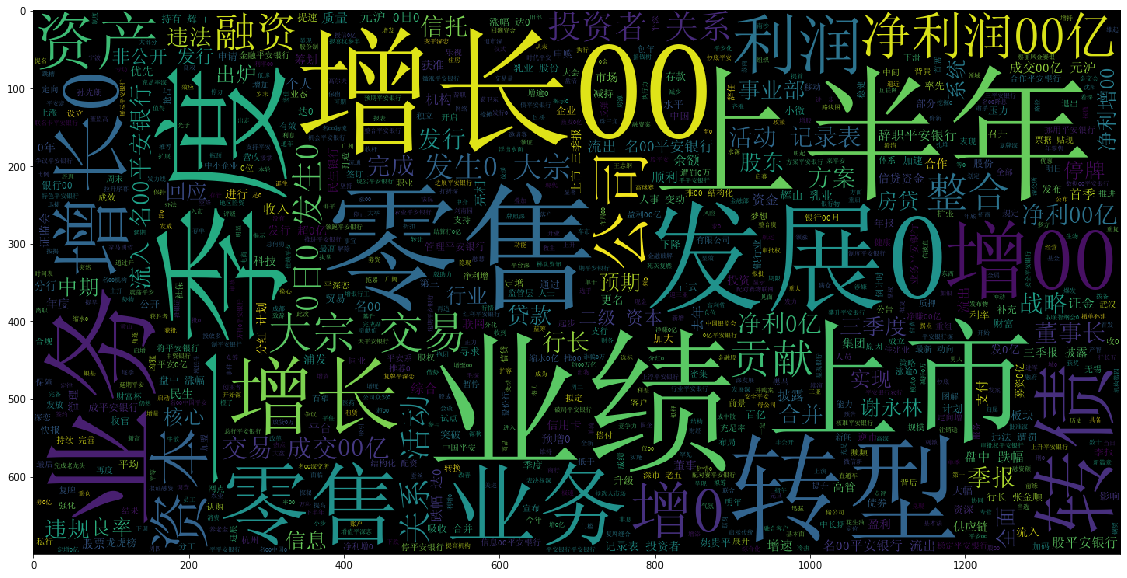

In [83]:
pos_text = df[df['exfuture5']>0.01]['title'].sum()
wc = WordCloud(max_words=800,stopwords=stopwords,font_path='SimSun.ttf',width=1400, height=700, margin=2).generate(pos_text)
plt.figure(figsize=(20,10))
plt.imshow(wc)

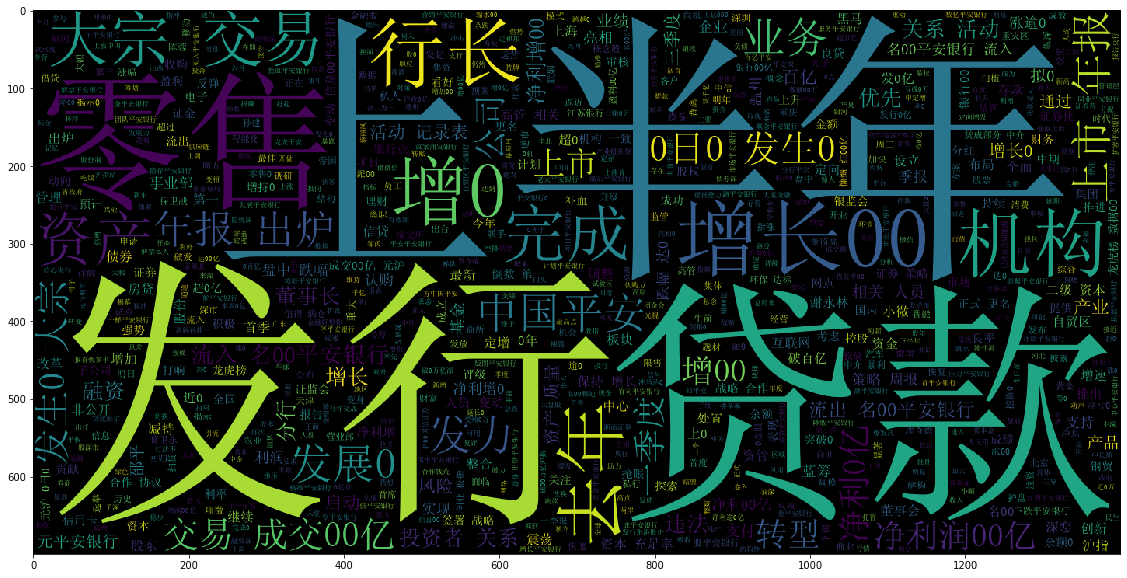

In [84]:
pos_text = df[df['exfuture5']<-0.01]['title'].sum()
wc = WordCloud(max_words=800,stopwords=stopwords,font_path='SimSun.ttf',width=1400, height=700, margin=2).generate(pos_text)
plt.figure(figsize=(20,10))
plt.imshow(wc)